<a href="https://colab.research.google.com/github/cybermax47/CS-351-AI-Lab-Github-repository-2022447/blob/main/M_Umar_Maqsood_CS_351L_Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

**Lab 4 Task**  
**Titanic Dataset Analysis**

### **Overview**
The Titanic dataset is a widely known dataset used for binary classification problems. The goal here is to predict whether a passenger survived the Titanic disaster based on several features. In this notebook, we will explore, preprocess, and implement machine learning models such as k-Nearest Neighbors (k-NN) and Decision Trees to make predictions about passenger survival. This dataset is obtained from Kaggle.

### **Steps Involved**

**Step 1: Setup Kaggle and Download the Dataset**

- **Kaggle API Setup**: Upload your `kaggle.json` file to authenticate and access datasets from Kaggle.
- **Download Titanic Dataset**: Use the Kaggle API to download the Titanic dataset.
- **Unzip the Dataset**: Extract the contents from the downloaded zip file.

**Step 2: Import Libraries and Load Data**

- **Libraries**: Import essential libraries for data manipulation (Pandas), numerical operations (NumPy), visualization (Seaborn, Matplotlib), and machine learning (scikit-learn).
- **Load Data**: Read the training data from the CSV file into a Pandas DataFrame and inspect the first few rows to understand its structure.

**Step 3: Data Visualization**

- **Feature Visualization**: Plot key features such as passenger class, age distribution, and gender distribution using count plots and histograms.
- **Missing Values**: Check for missing data and visualize it using a heatmap.

**Step 4: Data Preprocessing**

- **Handling Missing Values**: Fill missing values in the Age column with the median, drop the Cabin column, and fill missing values in the Embarked column with the most frequent value.
- **Encoding Categorical Variables**: Convert categorical variables such as Sex and Embarked into numerical format using mapping and one-hot encoding.
- **Feature Scaling**: Standardize features like Age and Fare for improved model performance.

**Step 5: Implement Machine Learning Models**

- **Feature Selection**: Choose Age and Fare as features for training the models, and Survived as the target variable.
- **Train-Test Split**: Divide the data into training and testing sets to evaluate the model's performance.
- **k-NN Model**: Train a k-Nearest Neighbors classifier and make predictions.
- **Decision Tree Model**: Train a Decision Tree classifier and make predictions.

**Step 6: Model Evaluation**

- **Performance Metrics**: Define a function to calculate metrics like accuracy, precision, recall, and F1-score.
- **Evaluate Models**: Evaluate both k-NN and Decision Tree models, and compare their performance.

**Step 7: Visualization of Decision Boundaries**

- **Plot Decision Boundaries**: Visualize the decision boundaries of the models with scatter plots.
- **Feature Importance**: Analyze how each model separates the classes based on Age and Fare.

**Step 8: Compare Model Performance**

- **Bar Charts**: Create bar charts to visually compare the performance of the k-NN and Decision Tree models.

### **Conclusion**
This notebook demonstrates a complete workflow for analyzing and modeling the Titanic dataset. By following these steps, you can understand the factors influencing passenger survival and implement machine learning models to make predictions.

---

### **Step 1: Download the Dataset**

```python
from google.colab import files

# Upload kaggle.json file
files.upload()  # This will prompt you to upload the kaggle.json file
```

### **Step 2: Import Libraries and Load Data**

```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
titanic_data = pd.read_csv('train.csv')
print(titanic_data.head())

# Visualizing the distribution of key features
sns.countplot(x='Pclass', data=titanic_data)
plt.title('Passenger Class Distribution')
plt.show()

sns.histplot(titanic_data['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='Sex', data=titanic_data)
plt.title('Gender Distribution')
plt.show()

# Checking for missing values
print(titanic_data.isnull().sum())

# Visualizing missing data
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()
```

### **Step 4: Data Preprocessing**

```python
# Handling missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data.drop('Cabin', axis=1, inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Encoding categorical variables
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

# Standardizing numerical features
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])
```

### **Part 2: Implement k-NN and Decision Tree Models**

```python
# Select features for model training
X = titanic_data[['Age', 'Fare']]  # Use only Age and Fare for training
y = titanic_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implementing k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Implementing Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
```

### **Step 6: Model Evaluation**

```python
# Evaluating the performance
def evaluate_model(predictions, true_labels):
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    return accuracy, precision, recall, f1

# k-NN evaluation
knn_metrics = evaluate_model(knn_predictions, y_test)
print("k-NN Performance:")
print(f"Accuracy: {knn_metrics[0]}, Precision: {knn_metrics[1]}, Recall: {knn_metrics[2]}, F1-Score: {knn_metrics[3]}")

# Decision Tree evaluation
dt_metrics = evaluate_model(dt_predictions, y_test)
print("Decision Tree Performance:")
print(f"Accuracy: {dt_metrics[0]}, Precision: {dt_metrics[1]}, Recall: {dt_metrics[2]}, F1-Score: {dt_metrics[3]}")
```

### **Part 3: Visualization**

```python
# Decision Boundaries
def plot_decision_boundaries(X, y, model, title):
    x1_min, x1_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    x2_min, x2_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.show()

# Use the same features for visualization
X_viz = X  # X already contains only 'Age' and 'Fare'
plot_decision_boundaries(X_viz, y, knn_model, 'k-NN Decision Boundaries')
plot_decision_boundaries(X_viz, y, dt_model, 'Decision Tree Decision Boundaries')

# Performance Visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
knn_scores = list(knn_metrics)
dt_scores = list(dt_metrics)

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, knn_scores, width, label='k-NN')
bars2 = ax.bar(x + width/2, dt_scores, width, label='Decision Tree')

# Adding labels and title
ax.set_xlabel('Metrics')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()
```

Saving train.csv to train.csv
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37345

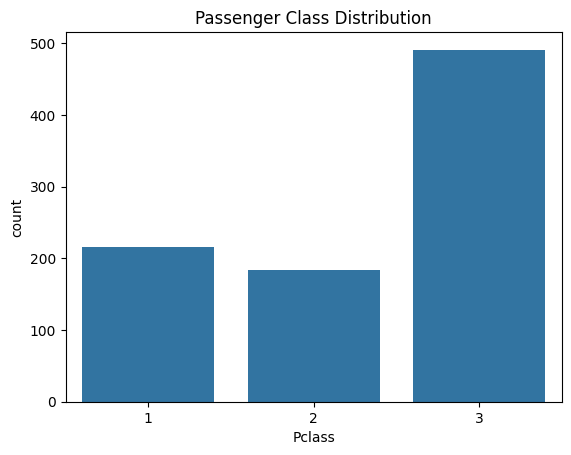

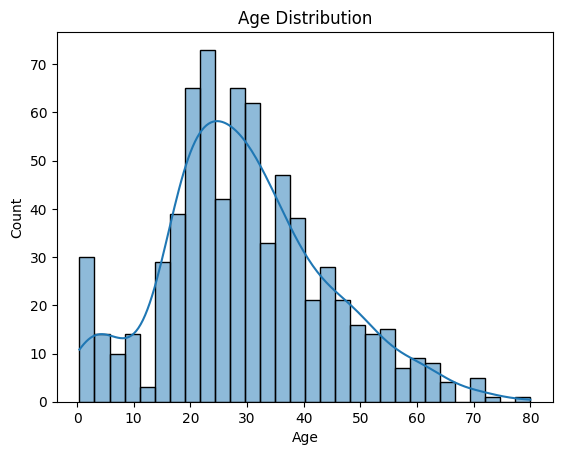

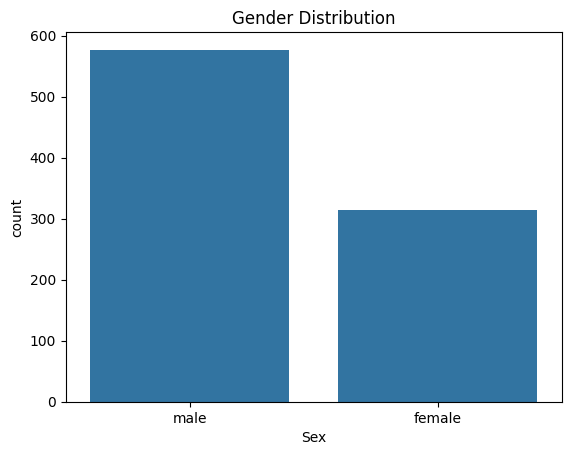

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


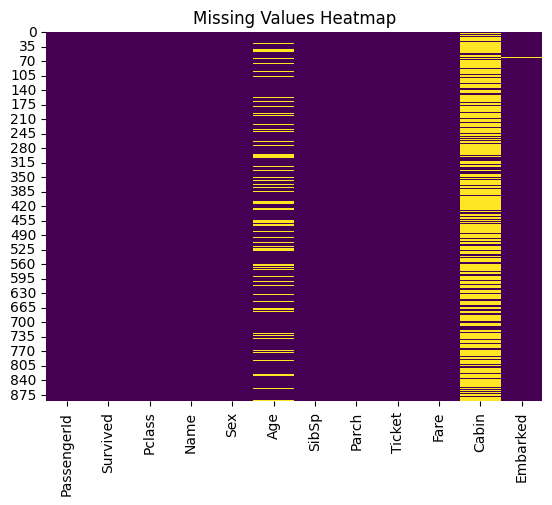

k-NN Performance:
Accuracy: 0.6828358208955224, Precision: 0.6625, Recall: 0.4774774774774775, F1-Score: 0.5549738219895288
Decision Tree Performance:
Accuracy: 0.6380597014925373, Precision: 0.5853658536585366, Recall: 0.43243243243243246, F1-Score: 0.49740932642487046


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


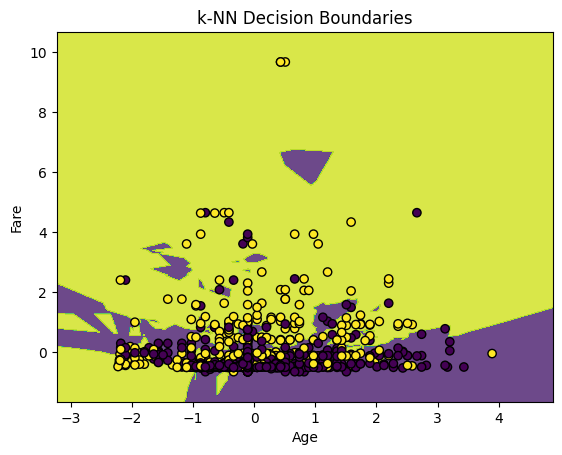

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


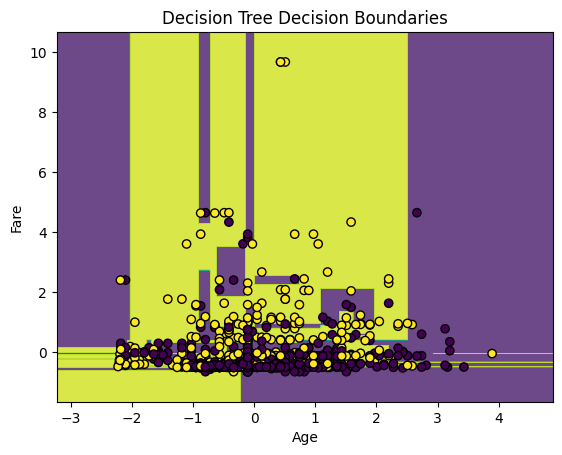

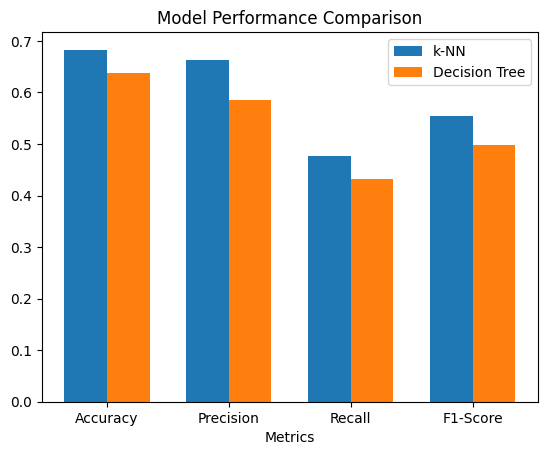

In [3]:

# Step 1: Download the Dataset
from google.colab import files

# Upload kaggle.json file
files.upload()  # This will prompt you to upload the kaggle.json file


# Step 2: Import Libraries and Load Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
titanic_data = pd.read_csv('train.csv')
print(titanic_data.head())

# Visualizing the distribution of key features
sns.countplot(x='Pclass', data=titanic_data)
plt.title('Passenger Class Distribution')
plt.show()

sns.histplot(titanic_data['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='Sex', data=titanic_data)
plt.title('Gender Distribution')
plt.show()

# Checking for missing values
print(titanic_data.isnull().sum())

# Visualizing missing data
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Handling missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data.drop('Cabin', axis=1, inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Encoding categorical variables
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

# Standardizing numerical features
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

# Part 2: Implementing k-NN and Decision Trees

# Select features for model training
X = titanic_data[['Age', 'Fare']]  # Use only Age and Fare for training
y = titanic_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implementing k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Implementing Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Evaluating the performance
def evaluate_model(predictions, true_labels):
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    return accuracy, precision, recall, f1

# k-NN evaluation
knn_metrics = evaluate_model(knn_predictions, y_test)
print("k-NN Performance:")
print(f"Accuracy: {knn_metrics[0]}, Precision: {knn_metrics[1]}, Recall: {knn_metrics[2]}, F1-Score: {knn_metrics[3]}")

# Decision Tree evaluation
dt_metrics = evaluate_model(dt_predictions, y_test)
print("Decision Tree Performance:")
print(f"Accuracy: {dt_metrics[0]}, Precision: {dt_metrics[1]}, Recall: {dt_metrics[2]}, F1-Score: {dt_metrics[3]}")

# Part 3: Visualization

# Decision Boundaries
def plot_decision_boundaries(X, y, model, title):
    x1_min, x1_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    x2_min, x2_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.show()

# Use the same features for visualization
X_viz = X  # X already contains only 'Age' and 'Fare'
plot_decision_boundaries(X_viz, y, knn_model, 'k-NN Decision Boundaries')
plot_decision_boundaries(X_viz, y, dt_model, 'Decision Tree Decision Boundaries')

# Performance Visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
knn_scores = list(knn_metrics)
dt_scores = list(dt_metrics)

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, knn_scores, width, label='k-NN')
bars2 = ax.bar(x + width/2, dt_scores, width, label='Decision Tree')

# Adding labels and title
ax.set_xlabel('Metrics')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()